# Checkpoint 3 - Regressão e Clusterização


## Instruções

Leia atentamente as instruções.

1) O trabalho deve ser realizado em grupo. Pode ser o mesmo grupo do challenge. Não deve ter nenhum grupo maior do que o maior grupo de challenge.

2) Você deverá submenter este arquivo Jupyter Notebook com as respostas nos campos indicados. Caso ache necessário, crie células markdown para comentar suas respostas e apontamentos.

3) Apenas um aluno submeterá no Teams. Mude o nome do arquivo para as iniciais do seu nome completo seguido do seu RM. Exemplo: HFS84100-NAC1

4) A entrega deverá ser feita até às <font color='red'>**19h00** </font> de  <font color='red'>**27/maio/2022** </font> em tarefa no Microsoft Teams.

5) As pontuações das questões estão marcadas em cada uma.

6) Todos os datasets usados aqui são públicos e podem ser consultados em https://www.kaggle.com ou em https://www.openml.org/

7) Dúvidas, pergunte para o professor.

## Nomes:

- Pedro Fernandes | RM84244
- Leandro de Jesus Luna | RM86492
- Fabbio Augusto de Souza Moura Boli | RM84695

---------------------------

## Dataset: Marketing vs Vendas

Você recebeu dados de investimento em diferentes canais de marketing e o número de vendas.


### Questão 1:  Carregue os dados descritivos e alvo na mesma tabela. Gere estatísticas básicas para todos os dados. Plote a matriz de correlação entre as colunas <font color='red'> (1.25 pontos) </font>

In [46]:
import pandas as pd

# Lib para plot dos gráficos
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
import seaborn as sns
import scipy.cluster.hierarchy as sch   # Dendograma

from sklearn.model_selection import train_test_split

# Lib p/ Agrupamento
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Desempenho
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [47]:
dados_marketing = pd.read_csv('advertising.csv')

In [48]:
dados_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   S.no       200 non-null    int64  
 1   TV         200 non-null    float64
 2   radio      200 non-null    float64
 3   newspaper  200 non-null    float64
 4   sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [49]:
dados_marketing.describe()

,S.no,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


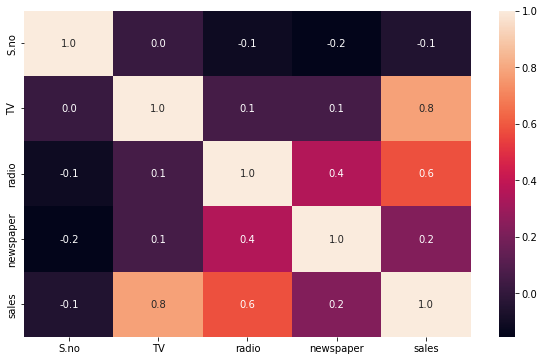

In [50]:
# Matriz de Correlacao
plt.figure(figsize=(10,6))
sns.heatmap(dados_marketing.corr(), annot=True, fmt=".1f");

### Questão 2:  Crie um regressor para predizer o número de vendas (sales) com R² de pelo menos 0.85 usando a metodologia 80/20. <font color='red'> (2.0 pontos) </font>

Nesta mesma célula markdown, descreva quais foram as técnicas que você usou para conseguir esse R².
R: O primeiro algoritmo que testamos foi a de Regressão Linear, que para métrica de R² já foi superior a 0.85, mas percebemos que não era preciso escalonar, e também dropamos uma coluna que parecia ser apenas uma contagem, então seria indiferente para o algortimo, e no Final ficamos com 0.89 de R².

In [51]:
# Escolhendo as colunas preditivas e alvo
x = dados_marketing.drop(columns = ['sales', 'S.no']) # Colunas descritivas
y = dados_marketing['sales']                # Valor alvo

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lr = LinearRegression()  # Criamos o objeto do regressor (não mudamos nenhum hiperpârametro)

lr.fit(x_train,y_train) # Treinamos o regressor passando apenas o conjunto de dados de treinamento 

LinearRegression()

In [54]:
y_predicoes = lr.predict(x_test) 

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

In [56]:
R2 = r2_score(y_true = y_test,   
              y_pred = y_predicoes) # Respostas do algoritmo passado teste realizado
print('R2: ', R2)  # Quanto mais próximos de 1 melhor

R2:  0.899438024100912


---------------------------
## Dataset: Fiats usados

Você recebeu dados sobre carros FIAT usados. Você quer prever o valor do carro a partir dos atributos descritivos dele.

Mais informações: https://www.kaggle.com/datasets/paolocons/small-dataset-about-used-fiat-500-sold-in-italy

### Questão 3:  Carregue os dados descritivos e alvo na mesma tabela. Gere estatísticas básicas para todos os dados e calcule o preço médio e a média das idades (em dias) dos carros por modelo. <font color='red'> (1.25 pontos) </font>

Dica: considere usar o comando do pandas .groupby()

In [57]:
dados_fiat = pd.read_csv('Used_fiat_500.csv')

In [58]:
dados_fiat.head()

,model,engine_power,transmission,age_in_days,km,previous_owners,lat,lon,price
0,pop,69,manual,4474,56779,2,45.071079,7.46403,4490
1,lounge,69,manual,2708,160000,1,45.069679,7.70492,4500
2,lounge,69,automatic,3470,170000,2,45.514599,9.28434,4500
3,sport,69,manual,3288,132000,2,41.903221,12.49565,4700
4,sport,69,manual,3712,124490,2,45.532661,9.03892,4790


In [59]:
dados_fiat.describe()

,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,73.015789,3310.265789,102196.250000,1.510526,44.257712,10.742644,5881.655263
std,9.984672,1437.555063,47115.355234,0.560244,1.767518,2.167753,2170.617946
min,69.000000,91.000000,4981.000000,1.000000,37.510872,7.320720,2890.000000
25%,69.000000,3097.250000,76611.750000,1.000000,43.514196,9.159140,4600.000000
50%,69.000000,3927.000000,112000.000000,1.000000,45.069679,10.301505,5000.000000
75%,69.000000,4322.000000,135000.000000,2.000000,45.556942,12.346788,5500.000000
max,101.000000,4719.000000,259000.000000,4.000000,46.781651,18.168011,15900.000000


In [60]:
dados_fiat_mean= dados_fiat[['model', 'price']]

In [61]:
dados_fiat_mean.groupby('model').mean()

,price
model,
lounge,6175.740566
pop,5618.990196
sport,5256.076923
star,10990.000000


### Questão 4:  Crie um regressor para determinar o preço do carro. Eles não devem usar a latitude e a longitude do vendedor, mas devem usar a transmissão (transforme e uma única coluna com 0 e 1). Use a metodologia 80/20. Calcule a MAE, MSE e R² do seu modelo e diga se o acha bom o suficiente. <font color='red'> (2.0 pontos) </font>


In [62]:
def converte_transmissao(transmissao):
    if transmissao == 'manual':
        return 0
    else:
        return 1

In [63]:
dados_fiat['transmission'] = dados_fiat['transmission'].apply(converte_transmissao)

In [64]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [65]:
# Escolhendo as colunas preditivas e alvo
x = dados_fiat.drop(columns = ['price','model', 'lat', 'lon']) # Colunas descritivas
y = dados_fiat['price'] # Valor alvo

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [66]:
lr = LinearRegression()  # Criamos o objeto do regressor (não mudamos nenhum hiperpârametro)
lr.fit(x_train,y_train) # Treinamos o regressor passando apenas o conjunto de dados de treinamento 

LinearRegression()

In [67]:
# 3 - Teste da Regressão Linear
y_predicoes = lr.predict(x_test)
R2 = r2_score(y_true = y_test,      # Gabarito
              y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('R2_LR: ', R2)  # Quanto mais próximos de 1 melhor

MAE = mean_absolute_error(y_true = y_test,      # Gabarito
                          y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MAE_LR: ', MAE)

MSE = mean_squared_error(y_true = y_test,      # Gabarito
                         y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MSE_LR: ', MSE)

R2_LR:  0.8821366513797342
MAE_LR:  608.5428653506118
MSE_LR:  601643.490150421


In [68]:
dados_fiat.head()

,model,engine_power,transmission,age_in_days,km,previous_owners,lat,lon,price
0,pop,69,0,4474,56779,2,45.071079,7.46403,4490
1,lounge,69,0,2708,160000,1,45.069679,7.70492,4500
2,lounge,69,1,3470,170000,2,45.514599,9.28434,4500
3,sport,69,0,3288,132000,2,41.903221,12.49565,4700
4,sport,69,0,3712,124490,2,45.532661,9.03892,4790


### Questão 5: Agrupamento  <font color='red'> (3.5 ponto)</font>

(a) Calule a quilometragem por ano de cada carro. Diga, use a função fornecida.

(b) Use um algoritmo de agrupamento para gerar clusters nos dados dos carros usados. Use somente as colunas km_per_year e price.

(c) Plote um gráfico de dispersão (scatterplot) com 4 subplotes. Todos os subplotes tem x = km_per_year e y = price. Use o parâmtro hue para que o primeiro subplote seja pintado pela coluna transmissiob, o segundo subplote pela coluna model, o terceiro pela coluna engine_power e o quarto pela coluna dos labels do agrupador do item (b). Considere usar a escala logaritmos em ambos os eixos. 

Dica: use o seaborn e set os eixos através de algo como axes[1][1].set_yscale('log'), onde [1][1] indica o gráfico no canto inferior direito e [0][0] indica o gráfico no canto superior esquerda em um subplot de 4 gráficos.

In [71]:
def km_per_year(km,year):return(km/year)
dados_fiat['km_per_year'] = dados_fiat.apply(lambda dados_fiat: km_per_year(dados_fiat['km'], dados_fiat['age_in_days']/365), axis=1) # Valor aproximado na KM, não considerado anos bissextos.

In [72]:
dados_fiat.head()

,model,engine_power,transmission,age_in_days,km,previous_owners,lat,lon,price,km_per_year
0,pop,69,0,4474,56779,2,45.071079,7.46403,4490,4632.171435
1,lounge,69,0,2708,160000,1,45.069679,7.70492,4500,21565.731167
2,lounge,69,1,3470,170000,2,45.514599,9.28434,4500,17881.844380
3,sport,69,0,3288,132000,2,41.903221,12.49565,4700,14653.284672
4,sport,69,0,3712,124490,2,45.532661,9.03892,4790,12241.069504


In [73]:
dados_grouping=dados_fiat[['km_per_year', 'price']]

In [74]:
# Modelos de agrupamento
km = KMeans(n_clusters=4, random_state=42)            # KNN k=4

In [75]:
km_class = km.fit_predict(dados_grouping)  

<AxesSubplot:xlabel='km_per_year', ylabel='price'>

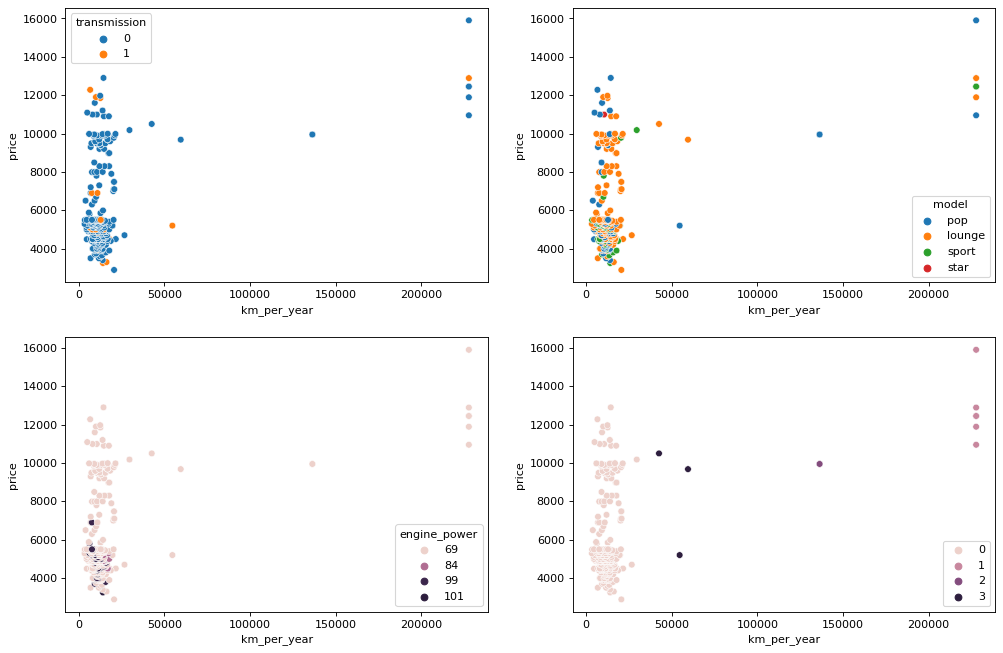

In [76]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), dpi=80)

sns.scatterplot(ax=axes[0][0],
            data=dados_fiat,  
            x = dados_fiat['km_per_year'],
            y = dados_fiat['price'],    
            hue = dados_fiat['transmission'],
            )

sns.scatterplot(ax=axes[0][1],
            data=dados_fiat,  
            x = dados_fiat['km_per_year'],
            y = dados_fiat['price'],    
            hue = dados_fiat['model'],
            )

sns.scatterplot(ax=axes[1][0],
            data=dados_fiat,  
            x = dados_fiat['km_per_year'],
            y = dados_fiat['price'],    
            hue = dados_fiat['engine_power'],
            )

sns.scatterplot(ax=axes[1][1],
            data=dados_fiat,  
            x = dados_fiat['km_per_year'],
            y = dados_fiat['price'],    
            hue = km_class,
            )